# Pymaceuticals inc.
#### Analysis

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine data into a single dataframe
df = study_results.merge(mouse_metadata, how='left', on='Mouse ID')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# display number of mice
df.nunique()['Mouse ID']

249

In [16]:
# check for duplicate mice ID and get rid of duplicate data
duplicate_id = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [53]:
# get all data from duplicate mouse ID
duplicate_df = df.loc[df['Mouse ID'] == 'g989', :]
duplicate_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [18]:
clean_df = df[df['Mouse ID'].isin(duplicate_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
mice_count = clean_df['Mouse ID'].nunique()
mice_count

248

# Summary Statistics

In [23]:
# group by drug regimen and then calculate important information
tumor_grp = clean_df.groupby(['Drug Regimen'])
tumor_grp

In [32]:
# mean, median, var, deviation and error.
tumor_mean = tumor_grp['Tumor Volume (mm3)'].mean()
tumor_median = tumor_grp['Tumor Volume (mm3)'].median()
tumor_var = tumor_grp['Tumor Volume (mm3)'].var()
tumor_stdev = tumor_grp['Tumor Volume (mm3)'].std()
tumor_sem = tumor_grp['Tumor Volume (mm3)'].sem()

# create data frame of summary stats
tumor_df = pd.DataFrame({
    'Mean': tumor_mean,
    'Median': tumor_median,
    'Variance': tumor_var,
    'Standard Deviation': tumor_stdev,
    'Standard Error': tumor_sem
})
tumor_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# do the same in a single line
tumor_df2 = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 
                                                                          'median',
                                                                          'var', 
                                                                          'std',
                                                                          'sem'])
tumor_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

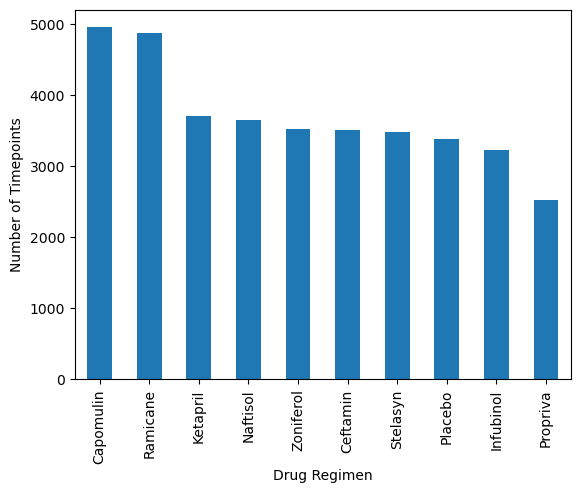

In [113]:
# make bar chart 1
timepoint_grp = clean_df.groupby(['Drug Regimen'])['Timepoint'].sum()
timepoint_grp.sort_values(ascending=False).plot.bar()
plt.ylabel('Number of Timepoints')
plt.show()

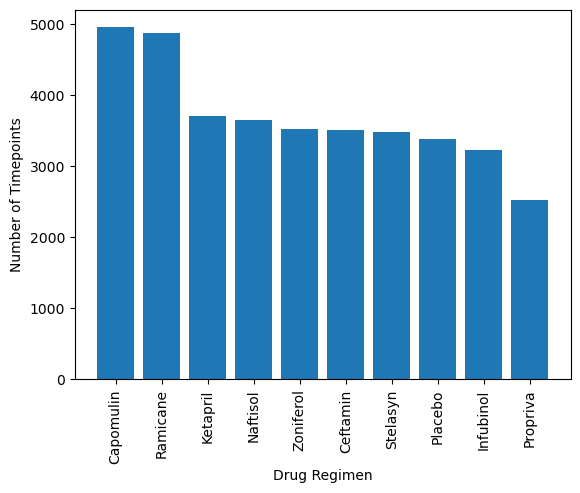

In [39]:
# bar chart 2
timepoint_descending = timepoint_grp.sort_values(ascending=False)
plt.bar(timepoint_descending.index, timepoint_descending.values)
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

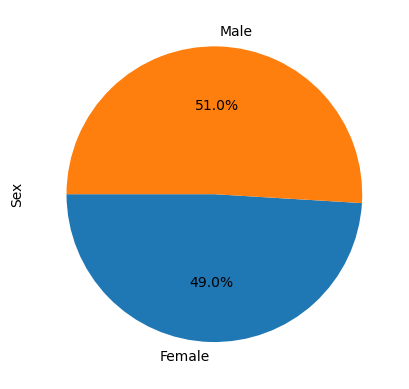

In [43]:
# generate pie chart 1 using pandas
sex = clean_df.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=180, autopct='%1.1f%%')
plt.show()

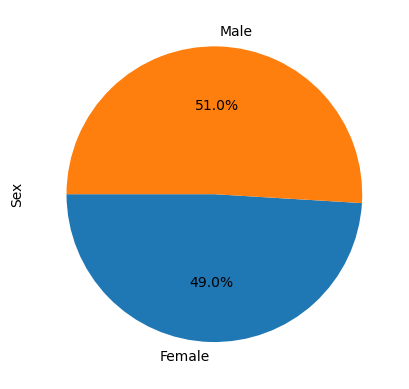

In [45]:
# generate pie chart 2 using plt
plt.pie(sex, labels=('Female', 'Male'), startangle=180, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# start by getting last timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [51]:
# merge max timepoint with original DF on the new dataframe timepoint to get the rest 
# of the data at the final timepoint
max_df = pd.merge(clean_df, max_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
max_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#create empty lists to fill with tumor data for plotting
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

# get values 
for index, row in max_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ramicane':
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Infubinol':
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ceftamin':
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])

# create subset
drug_lists = pd.DataFrame({
    'Capomulin' : tumor_capomulin,
    'Ramicane' : tumor_ramicane,
    'Infubinol' : tumor_infubinol,
    'Ceftamin' : tumor_ceftamin
})

# determine outliers using upper and lower bounds
# Capomulin
quart_capo = drug_lists['Capomulin'].quantile([.25, .5, .75])
low_capo = quart_capo[.25]
med_capo = quart_capo[.5]
up_capo = quart_capo[.75]
iqr_capo = up_capo - low_capo
lowbound_capo = low_capo - (1.5*iqr_capo)
upbound_capo = up_capo + (1.5*iqr_capo)
min_capo = drug_lists['Capomulin'].min()
max_capo = drug_lists['Capomulin'].max()

# Ramicane
quart_ram = drug_lists['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram - low_ram
lowbound_ram = low_ram - (1.5*iqr_ram)
upbound_ram = up_ram + (1.5*iqr_ram)
min_ram = drug_lists['Ramicane'].min()
max_ram = drug_lists['Ramicane'].max()

# Infubinol
quart_inf = drug_lists['Infubinol'].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf - low_inf
lowbound_inf = low_inf - (1.5*iqr_inf)
upbound_inf = up_inf + (1.5*iqr_inf)
min_inf = drug_lists['Infubinol'].min()
max_inf = drug_lists['Infubinol'].max()

# Ceftamin
quart_ceft = drug_lists['Ceftamin'].quantile([.25, .5, .75])
low_ceft = quart_ceft[.25]
med_ceft = quart_ceft[.5]
up_ceft = quart_ceft[.75]
iqr_ceft = up_ceft - low_ceft
lowbound_ceft = low_ceft - (1.5*iqr_ceft)
upbound_ceft = up_ceft + (1.5*iqr_ceft)
min_ceft = drug_lists['Ceftamin'].min()
max_ceft = drug_lists['Ceftamin'].max()


In [96]:
# create a dataframe to visualize outliers
outliers = pd.DataFrame({
    'Drug' : treatments,
    'Lower Bound' : [lowbound_capo, lowbound_ram, lowbound_inf, lowbound_ceft],
    'Minimum Value' : [min_capo, min_ram, min_inf, min_ceft],
    'Max Value' : [max_capo, max_ram, max_inf, max_ceft],
    'Upper Bound' : [upbound_capo, upbound_ram, upbound_inf, upbound_ceft]
})
print(outliers.set_index('Drug'))
# observe any outliers
print('-----------')
print('We can see there is an Outlier in the treatment Infubinol as the minimum value is less than the Lower Bound')

           Lower Bound  Minimum Value  Max Value  Upper Bound
Drug                                                         
Capomulin    20.704562      23.343598  47.685963    51.832015
Ramicane     17.912664      22.050126  45.220869    54.306811
Infubinol    36.832905      36.321346  72.226731    82.741446
Ceftamin     25.355450      45.000000  68.923185    87.666458
-----------
We can see there is an Outlier in the treatment Infubinol as the minimum value is less than the Lower Bound


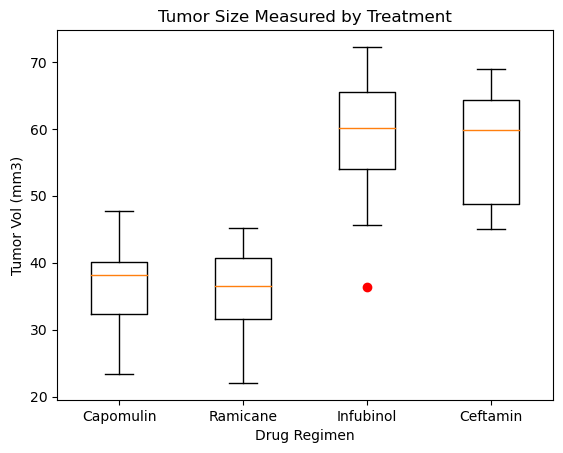

In [112]:
# generate boxplot
boxplot_list = [drug_lists['Capomulin'],
                drug_lists['Ramicane'],
                drug_lists['Infubinol'],
                drug_lists['Ceftamin']
               ]

plt.boxplot(boxplot_list, 0, 'r')
plt.title('Tumor Size Measured by Treatment')
plt.ylabel('Tumor Vol (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4], treatments)

plt.show()

# Line and Scatter Plots

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# mouse l509
line_df = clean_df.loc[clean_df['Mouse ID'] == 'l509', :]
line_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


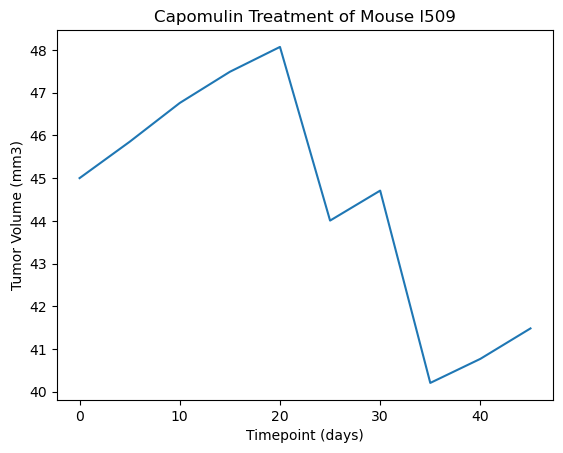

In [138]:
# create line graph
plt.plot(line_df['Timepoint'], line_df['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [129]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
capo_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [136]:
# get average values
capo_avg = capo_df.groupby(['Mouse ID']).mean()
capo_avg.head()

/var/folders/58/wf3rb_4174q5hgcffz8xp_640000gn/T/ipykernel_96031/962196611.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capo_avg = capo_df.groupby(['Mouse ID']).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


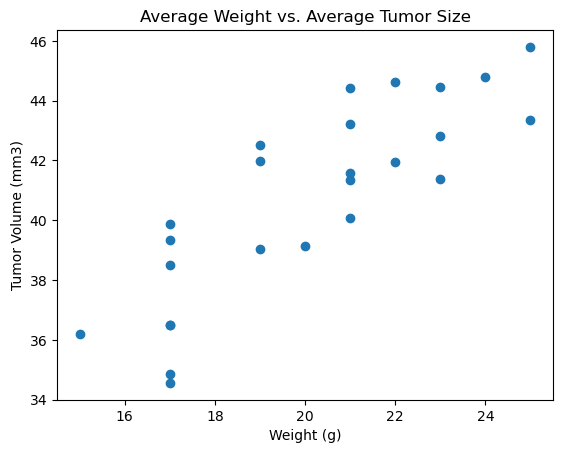

In [139]:
# create scatterplot
plt.scatter(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
plt.title('Average Weight vs. Average Tumor Size')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

# Correlation and Regression

In [155]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])[0],2)
print(f"The pearson correlation coefficient between mouse weight and average tumor volume is {corr}")

The pearson correlation coefficient between mouse weight and average tumor volume is 0.84


In [158]:
linreg = st.linregress(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
linreg

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

The pearson correlation coefficient between mouse weight and average tumor volume is 0.84


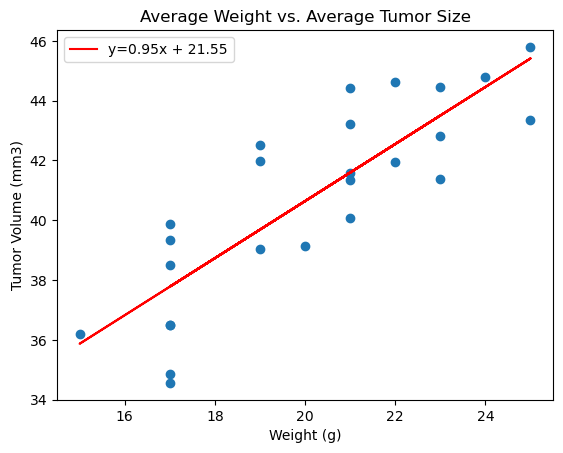

In [167]:
# regression line
slope = 0.9544396890241049
intercept = 21.552160532685008

# create line formula 
reg_line = slope * (capo_avg['Weight (g)']) + intercept

# replot the scatterplot and add regression line
plt.scatter(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
plt.title('Average Weight vs. Average Tumor Size')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
# add regression line in red
plt.plot(capo_avg['Weight (g)'], reg_line, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

print(f"The pearson correlation coefficient between mouse weight and average tumor volume is {corr}")
plt.show()